In [8]:
## Ecrit par Redouane Lguensat
## pour le cours Deep Learning du Data Engineering Master de l'EHTP
## Avril 2020

## Exercice 1

In [9]:
import numpy as np
import math

In [10]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [11]:
sigmoid(0.55*0.5+(-0.35)*0.45+0.15)

0.5664790559676278

## Exercice 2

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

c:\Users\22296\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

# Tutoriel MNIST 

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

charger la base de données MNIST

In [16]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


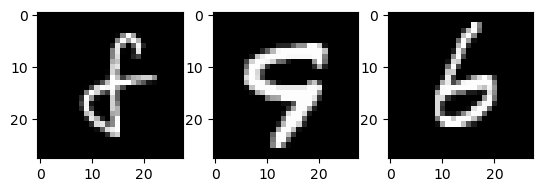

In [17]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:], cmap='gray')

In [18]:
x_train[randindices[0],:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   8, 138, 254, 165,  10,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 138, 250, 160, 248, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Aplatir les images et normalisation

In [19]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


convertir les classes en vecteurs binaires (categorical)

In [20]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## entraînement d'un MLP

In [21]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

ValueError: Argument(s) not recognized: {'lr': 0.001}

In [0]:
batch_size = 128
epochs = 12

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.2511 - accuracy: 0.9255 - val_loss: 0.1049 - val_accuracy: 0.9680
Epoch 2/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.1021 - accuracy: 0.9683 - val_loss: 0.0755 - val_accuracy: 0.9749
Epoch 3/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0683 - val_accuracy: 0.9774
Epoch 4/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 5/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 6/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 7/12
60000/60000 [==============================] - 2s 38us/st

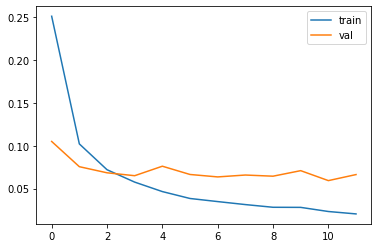

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

score sur toute la base de données de test

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06628334235537732
Test accuracy: 0.9836000204086304


regardons le résultat sur quelques images de test

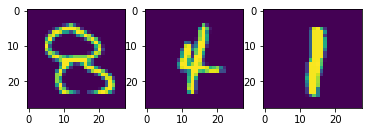

In [21]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)))
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)))
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)))

In [22]:
predictions=model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 2 avec une confiance 97.8247582912445%.
Le réseau reconnaît le chiffre 4 avec une confiance 99.9996542930603%.
Le réseau reconnaît le chiffre 1 avec une confiance 100.0%.


In [0]:
#4140